In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import sys
sys.path.append("../")
from teju_utils.stats_metrics import *
from teju_utils.plots import *

In [2]:
import glob

In [3]:
def extract_names(f):
    if "generated" in f:
        split=f.split("/data/generated/")[1].split("/")        
        stage='1' if split[2] == 'stage1' else '2'
        # print(split, stage)
        dict = {
            "tag": "fake",
            "fake_path": f,
            "dataset":split[0],
            "cross_val":split[1].strip("CrossVal_"),
            "knowledge_base":split[2].strip("KB_"),
            "stage":stage,
            "freq":split[3] if stage == '2' else None,
            "method":split[4] if stage == '2' else None,
            "seed":split[5].strip("Seed") if stage == '2' else None,
            "TF":split[6].strip("TF") if stage == '2' else None,
            "simulated":split[8] if stage == '2' else split[4]
        }
    else:
        dict= {}
    return dict


In [17]:
PROJECT_DIR="/home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/"
df=[]

# for dataset in ["PBMC", "PBMC_CTL", "BoneMarrow", 'LinearUniform', 'COVID_Haniffa21']: 
for dataset in ["COVID_Haniffa21"]:
    for cross_val in ["CrossVal_1000", "CrossVal_2000"]:
        files=glob.glob(f'{PROJECT_DIR}/data/generated/{dataset}/{cross_val}/**/*.h5ad', recursive=True)
        for f in files:
            # print(f)
            dict=extract_names(f)
            # print(dict)
            if dataset=='PBMC':
                dict['train_path']=f"{PROJECT_DIR}/data/processed/PBMC/{cross_val}/PBMC68k_train.h5ad"
                dict['test_path']=f'{PROJECT_DIR}/data/processed/PBMC/{cross_val}/PBMC68k_test.h5ad'
                dict['valid_path']=f'{PROJECT_DIR}/data/processed/PBMC/{cross_val}/PBMC68k_validation.h5ad'
            elif dataset == 'PBMC_CTL':
                dict['train_path']=f"{PROJECT_DIR}/data/processed/PBMC_CTL/{cross_val}/PBMC_CTL20k_train.h5ad"
                dict['test_path']=f'{PROJECT_DIR}/data/processed/PBMC_CTL/{cross_val}/PBMC_CTL20k_test.h5ad'
                dict['valid_path']=f'{PROJECT_DIR}/data/processed/PBMC_CTL/{cross_val}/PBMC_CTL20k_validation.h5ad'
            elif dataset == 'BoneMarrow':
                dict['train_path']=f"{PROJECT_DIR}/data/processed/BoneMarrow/{cross_val}/BoneMarrow2k_train.h5ad"
                dict['test_path']=f'{PROJECT_DIR}/data/processed/BoneMarrow/{cross_val}/BoneMarrow2k_test.h5ad'
                dict['valid_path']=f'{PROJECT_DIR}/data/processed/BoneMarrow/{cross_val}/BoneMarrow2k_validation.h5ad'
            elif dataset == 'LinearUniform':
                dict['train_path']=f"{PROJECT_DIR}/data/processed/LinearUniform/{cross_val}/LinearUniform5k_train.h5ad"
                dict['test_path']=f'{PROJECT_DIR}/data/processed/LinearUniform/{cross_val}/LinearUniform5k_test.h5ad'
                dict['valid_path']=f'{PROJECT_DIR}/data/processed/LinearUniform/{cross_val}/LinearUniform5k_validation.h5ad'
            else:
                dict['train_path']=f"{PROJECT_DIR}/data/processed/{dataset}/{cross_val}/{dataset}_train.h5ad"
                dict['test_path']=f'{PROJECT_DIR}/data/processed/{dataset}/{cross_val}/{dataset}_test.h5ad'
                dict['valid_path']=f'{PROJECT_DIR}/data/processed/{dataset}/{cross_val}/{dataset}_validation.h5ad'
            
            df.append(dict)

df=pd.DataFrame(df)

In [18]:
df_partial=df.query("stage=='2' and knowledge_base=='Sapien'")
df_partial=df_partial[~df_partial.duplicated(subset=['cross_val','train_path','test_path'])]
df_partial

tag                                          fake_path          dataset  \
0  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   

  cross_val knowledge_base stage       freq method seed  TF         simulated  \
0      1000         Sapien     2  freq_None  GRNB2    1  10  simulated_0.h5ad   

                                          train_path  \
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   

                                           test_path  \
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   

                                          valid_path  
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...

In [19]:
df=df.query("simulated !='simulated_trainsize.h5ad'")
df=df.query("cross_val == '1000'")
# df=df.query("knowledge_base == 'GPT4.1' and method == 'GPT4.1'")
print(len(df))

4


In [20]:
df_results = pd.read_csv("results2.csv")
df = df[~df.fake_path.isin(df_results.fake_path)]
print(len(df))
# 

4


In [21]:
# df_results=None

In [22]:
# df=df.query("knowledge_base =='Random' or stage == '1'")
# df=df.head(5)

In [23]:
# df=df.query("cross_val=='1000'")

In [24]:
df.tail(6)

tag                                          fake_path          dataset  \
0  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   
1  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   
2  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   
3  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   

  cross_val knowledge_base stage       freq method seed  TF         simulated  \
0      1000         Sapien     2  freq_None  GRNB2    1  10  simulated_0.h5ad   
1      1000         Sapien     2  freq_None  GRNB2    1  10  simulated_2.h5ad   
2      1000         Sapien     2  freq_None  GRNB2    1  10  simulated_1.h5ad   
3      1000         Sapien     2  freq_None  GRNB2    1  10  simulated_3.h5ad   

                                          train_path  \
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
1  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
2  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
3  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   

                                           test_path  \
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
1  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
2  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
3  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   

                                          valid_path  
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  
1  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  
2  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  
3  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...

In [25]:
# import scanpy as sc

In [26]:
from teju_utils.stats_metrics import *

In [27]:
metric='perc_zeros'
df[metric+'_fake'] = df['fake_path'].apply(lambda x: calculate_perc_zeros(x))
df[metric+'_train'] = df_partial['train_path'].apply(lambda x: calculate_perc_zeros(x))
df[metric+'_test'] = df_partial['test_path'].apply(lambda x: calculate_perc_zeros(x))
df[metric+'_valid'] = df_partial['valid_path'].apply(lambda x: calculate_perc_zeros(x))

In [28]:
metric='cosine_distance'
MULTIPLIER=10**3
# MULTIPLIER=10**2
MULTIPLIER=1
# df[metric+'_fake_train'] = df.apply(lambda x: compute_cosine(x['train_path'], x['fake_path'])*MULTIPLIER, axis=1)
df[metric+'_fake_test'] = df.apply(lambda x: compute_cosine(x['test_path'], x['fake_path'])*MULTIPLIER, axis=1)
df_partial[metric+'_train_test'] = df_partial.apply(lambda x: compute_cosine(x['test_path'], x['train_path'])*MULTIPLIER, axis=1)


In [29]:
df=df.fillna("None")
columns=[f'{metric}_fake_test']
df.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method","cross_val"]).agg(['mean', 'std'])[columns]

cosine_distance_fake_test  \
                                                                                     mean   
dataset         stage knowledge_base freq      method cross_val                             
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000                         0.0013   

                                                                           
                                                                      std  
dataset         stage knowledge_base freq      method cross_val            
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000       0.000298

In [30]:
df_tmp=df.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method"]).agg(['mean', 'std'])['cosine_distance_fake_test']
df_tmp.style.highlight_min(color='yellow')  

In [31]:
df_partial=df_partial.fillna("None")
columns=[f'{metric}_train_test']
df_partial.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method","cross_val"]).agg(['mean', 'std'])[columns]

cosine_distance_train_test  \
                                                                                      mean   
dataset         stage knowledge_base freq      method cross_val                              
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000                        0.000816   

                                                                     
                                                                std  
dataset         stage knowledge_base freq      method cross_val      
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000      NaN

In [32]:
# test_path='/p/project1/hai_steerllms/GRouNdGAN//data/processed/PBMC/CrossVal_2000/PBMC68k_test.h5ad'
# fake_path="../results/PBMC/CrossVal_1000/KB_GPT/freq_2/GPT4/Seed1/TF10/GRouNdGAN/simulated_3.h5ad"
# real,fake=compute_tsne(test_path, fake_path)

In [33]:
# from teju_utils.plots import plot_tsne
# plot_tsne(real, fake)

In [34]:
metric='euclidean_distance'
# df[metric+'_fake_train'] = df.apply(lambda x: compute_euclidean(x['train_path'], x['fake_path']), axis=1)
df[metric+'_fake_test'] = df.apply(lambda x: compute_euclidean(x['test_path'], x['fake_path']), axis=1)
df_partial[metric+'_train_test'] = df_partial.apply(lambda x: compute_euclidean(x['test_path'], x['train_path']), axis=1)


In [35]:
df=df.fillna("None")
columns=[f'{metric}_fake_test']
df.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method", "cross_val"]).agg(['mean', 'std'])[columns]

euclidean_distance_fake_test  \
                                                                                        mean   
dataset         stage knowledge_base freq      method cross_val                                
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000                         94.368244   

                                                                            
                                                                       std  
dataset         stage knowledge_base freq      method cross_val             
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000       12.029572

In [36]:
# metric='euclidean_distance'

# df=df.fillna("None")
# columns=[f'{metric}_fake_test']
# df.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method"]).agg(['mean', 'std'])[columns]

In [37]:
df=df.fillna("None")
columns=[f'{metric}_fake_test']
df.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method","cross_val"]).agg(['mean', 'std'])[columns]

euclidean_distance_fake_test  \
                                                                                        mean   
dataset         stage knowledge_base freq      method cross_val                                
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000                         94.368244   

                                                                            
                                                                       std  
dataset         stage knowledge_base freq      method cross_val             
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000       12.029572

In [38]:
# compute_euclidean(test_path,"../results/PBMC/CrossVal_1000/KB_GPT/freq_2/GPT4/Seed1/TF10/GRouNdGAN/simulated_3.h5ad")

In [39]:
df_partial=df_partial.fillna("None")
columns=[f'{metric}_train_test']
df_partial.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method"]).agg(['mean', 'std'])[columns]

euclidean_distance_train_test  \
                                                                               mean   
dataset         stage knowledge_base freq      method                                 
COVID_Haniffa21 2     Sapien         freq_None GRNB2                      72.997977   

                                                           
                                                      std  
dataset         stage knowledge_base freq      method      
COVID_Haniffa21 2     Sapien         freq_None GRNB2  NaN

In [40]:
metric='random_forest'
# df[metric+'_fake_train'] = df.apply(lambda x: compute_auroc_rf(x['train_path'], x['fake_path']), axis=1)
df[metric+'_fake_test'] = df.apply(lambda x: compute_auroc_rf(x['test_path'], x['fake_path']), axis=1)
df_partial[metric+'_train_test'] = df_partial.apply(lambda x: compute_auroc_rf(x['test_path'], x['train_path']), axis=1)

In [41]:
metric='random_forest'
df=df.fillna("None")
columns=[f'{metric}_fake_test']
df.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method"]).agg(['mean', 'std'])[columns]

random_forest_fake_test  \
                                                                         mean   
dataset         stage knowledge_base freq      method                           
COVID_Haniffa21 2     Sapien         freq_None GRNB2                 0.844796   

                                                                 
                                                            std  
dataset         stage knowledge_base freq      method            
COVID_Haniffa21 2     Sapien         freq_None GRNB2   0.061426

In [42]:
df

tag                                          fake_path          dataset  \
0  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   
1  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   
2  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   
3  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   

  cross_val knowledge_base stage       freq method seed  TF  ...  \
0      1000         Sapien     2  freq_None  GRNB2    1  10  ...   
1      1000         Sapien     2  freq_None  GRNB2    1  10  ...   
2      1000         Sapien     2  freq_None  GRNB2    1  10  ...   
3      1000         Sapien     2  freq_None  GRNB2    1  10  ...   

                                          train_path  \
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
1  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
2  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
3  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   

                                           test_path  \
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
1  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
2  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   
3  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   

                                          valid_path perc_zeros_fake  \
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        24.83035   
1  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        24.65765   
2  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        25.03650   
3  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        25.09300   

   perc_zeros_train perc_zeros_test perc_zeros_valid  \
0          78.47091        78.66225          78.6684   
1              None            None             None   
2              None            None             None   
3              None            None             None   

  cosine_distance_fake_test  euclidean_distance_fake_test  \
0                  0.001251                     91.409264   
1                  0.001675                    108.522186   
2                  0.001324                     97.781273   
3                  0.000951                     79.760254   

   random_forest_fake_test  
0                 0.764944  
1                 0.914510  
2                 0.845896  
3                 0.853834  

[4 rows x 21 columns]

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


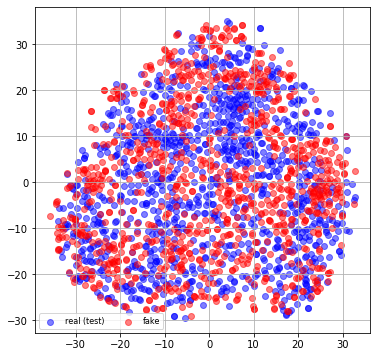

In [43]:
real_embedding, fake_embedding = compute_tsne(
    get_array(sc.read_h5ad('/home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN//data/processed/PBMC_CTL/CrossVal_1000/PBMC_CTL20k_test.h5ad')), 
                                              get_array(sc.read_h5ad('/home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN//data/generated/PBMC_CTL/CrossVal_1000/KB_GPT4.1/freq_1/GPT4.1/Seed1/TF10/GRouNdGAN/simulated_0.h5ad')),
                                                        random_seed=42)
plot_tsne(real_embedding, fake_embedding, simulated_name='fake')

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


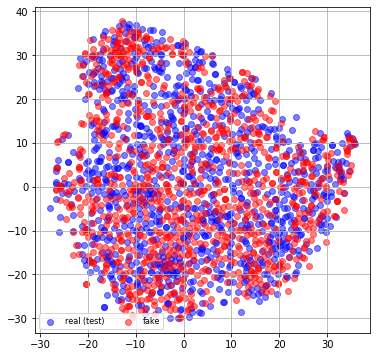

In [44]:
real_embedding, fake_embedding = compute_tsne(
    get_array(sc.read_h5ad('/home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN//data/processed/PBMC_CTL/CrossVal_1000/PBMC_CTL20k_test.h5ad')), 
                                              get_array(sc.read_h5ad('/home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN//data/generated/PBMC_CTL/CrossVal_1000/KB_GPT4.1/freq_1_hacky/GPT4.1/Seed1/TF10/GRouNdGAN/simulated_0.h5ad')),
                                                        random_seed=42)
plot_tsne(real_embedding, fake_embedding, simulated_name='fake')

In [45]:
df_partial=df_partial.fillna("None")
columns=[f'{metric}_train_test']
df_partial.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method"]).agg(['mean', 'std'])[columns]

random_forest_train_test  \
                                                                          mean   
dataset         stage knowledge_base freq      method                            
COVID_Haniffa21 2     Sapien         freq_None GRNB2                  0.564957   

                                                           
                                                      std  
dataset         stage knowledge_base freq      method      
COVID_Haniffa21 2     Sapien         freq_None GRNB2  NaN

In [46]:
metric='mmd'
# MULTIPLIER=10**2
# MULTIPLIER=10**1
MULTIPLIER=1
# df[metric+'_fake_train'] = df.apply(lambda x: compute_mmd(x['train_path'], x['fake_path']), axis=1)
df[metric+'_fake_test'] = df.apply(lambda x: compute_mmd(x['test_path'], x['fake_path'])*MULTIPLIER, axis=1)
df_partial[metric+'_train_test'] = df_partial.apply(lambda x: compute_mmd(x['test_path'], x['train_path'])*MULTIPLIER, axis=1)

In [47]:
df.to_csv("df_results_stats.csv", index=None)
df_partial.to_csv("df_partial_results_stats.csv", index=None)

In [48]:
# import pandas as pd
# df=pd.read_csv("df_results_30.09.csv")
# df_partial=pd.read_csv("df_partial_results_30.09.csv")

In [49]:
metric='mmd'
df=df.fillna("None")
columns=[f'{metric}_fake_test']
df.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method"]).agg(['mean', 'std'])[columns]

mmd_fake_test          
                                                               mean       std
dataset         stage knowledge_base freq      method                        
COVID_Haniffa21 2     Sapien         freq_None GRNB2        0.01038  0.001653

In [50]:
df=df.fillna("None")
columns=[f'{metric}_fake_test']
df.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method", "cross_val"]).agg(['mean', 'std'])[columns]

mmd_fake_test  \
                                                                         mean   
dataset         stage knowledge_base freq      method cross_val                 
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000            0.01038   

                                                                           
                                                                      std  
dataset         stage knowledge_base freq      method cross_val            
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000       0.001653

In [51]:
df_partial=df_partial.fillna("None")
columns=[f'{metric}_train_test']
df_partial.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method"]).agg(['mean', 'std'])[columns]

mmd_train_test    
                                                                mean std
dataset         stage knowledge_base freq      method                   
COVID_Haniffa21 2     Sapien         freq_None GRNB2        0.004879 NaN

In [52]:
metric='milisi'
# MULTIPLIER=10**2
MULTIPLIER=1
# df[metric+'_fake_train'] = df.apply(lambda x: compute_milisi(x['train_path'], x['fake_path'])*MULTIPLIER, axis=1)
df[metric+'_fake_test'] = df.apply(lambda x: compute_milisi(x['test_path'], x['fake_path'])*MULTIPLIER, axis=1)
df_partial[metric+'_train_test'] = df_partial.apply(lambda x: compute_milisi(x['test_path'], x['train_path'])*MULTIPLIER, axis=1)

df=df.fillna("None")
columns=[f'{metric}_fake_test']
df.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method","cross_val"]).agg(['mean', 'std'])[columns]

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default lea

milisi_fake_test  \
                                                                            mean   
dataset         stage knowledge_base freq      method cross_val                    
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000              1.893423   

                                                                           
                                                                      std  
dataset         stage knowledge_base freq      method cross_val            
COVID_Haniffa21 2     Sapien         freq_None GRNB2  1000       0.020937

In [53]:
columns=['cosine distance', 'euclidean distance', 'mmd', 'random forest', 'milisi']
df_partial=df_partial.fillna("None")
df_partial['knowledge_base']='control'
df_partial = df_partial.rename(columns={
    'cosine_distance_train_test': 'cosine distance',
    'euclidean_distance_train_test': 'euclidean distance',
    'mmd_train_test': 'mmd',
    'random_forest_train_test': 'random forest',
    'milisi_train_test': 'milisi'
})
df_partial.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method"]).agg(['mean', 'std'])[columns].round(3)

cosine distance      \
                                                                 mean std   
dataset         stage knowledge_base freq      method                       
COVID_Haniffa21 2     control        freq_None GRNB2            0.001 NaN   

                                                      euclidean distance      \
                                                                    mean std   
dataset         stage knowledge_base freq      method                          
COVID_Haniffa21 2     control        freq_None GRNB2              72.998 NaN   

                                                         mmd      \
                                                        mean std   
dataset         stage knowledge_base freq      method              
COVID_Haniffa21 2     control        freq_None GRNB2   0.005 NaN   

                                                      random forest      \
                                                               mean std   
dataset         stage knowledge_base freq      method                     
COVID_Haniffa21 2     control        freq_None GRNB2          0.565 NaN   

                                                      milisi      
                                                        mean std  
dataset         stage knowledge_base freq      method             
COVID_Haniffa21 2     control        freq_None GRNB2   1.941 NaN

In [67]:
df_partial

tag                                          fake_path          dataset  \
0  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   

  cross_val knowledge_base stage       freq method seed  TF         simulated  \
0      1000        control     2  freq_None  GRNB2    1  10  simulated_0.h5ad   

                                          train_path  \
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   

                                           test_path  \
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...   

                                          valid_path  cosine distance  \
0  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...         0.000816   

   euclidean distance  random forest       mmd    milisi  
0           72.997977       0.564957  0.004879  1.940639

In [55]:
df=df.fillna("None")
df = df.rename(columns={
    'cosine_distance_fake_test': 'cosine distance',
    'euclidean_distance_fake_test': 'euclidean distance',
    'mmd_fake_test': 'mmd',
    'random_forest_fake_test': 'random forest',
    'milisi_fake_test': 'milisi'
})


In [56]:
df_combine=pd.concat([df_partial, df])

In [57]:
df_combine['knowledge_base'] = df_combine['knowledge_base'].apply(lambda x: '1-'+x if x == 'Sapien' else '2-'+x)

In [58]:
# df_results=None

In [59]:
try: 
    print(df_results)
except:
    df_results = None
    
if df_results is not None:
    df_results = pd.concat([df_results, df_combine], axis=0)
else:
    df_results = df_combine
len(df_results)

      tag                                          fake_path     dataset  \
0    fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        PBMC   
1    fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...    PBMC_CTL   
2    fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  BoneMarrow   
3    fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        PBMC   
4    fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        PBMC   
..    ...                                                ...         ...   
206  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  BoneMarrow   
207  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  BoneMarrow   
208  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  BoneMarrow   
209  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  BoneMarrow   
210  fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  BoneMarrow   

     cross_val knowledge_base  stage          freq   method seed  TF  ...  \
0         

216

In [60]:
df_results.to_csv("results3.csv",index=None)

In [61]:
# df=df.fillna("None")
# columns=['cosine_distance_fake_test', 'euclidean_distance_fake_test', 'mmd_fake_test', 'random_forest_fake_test', ]
# df.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method","cross_val"]).agg(['mean', 'std'])[columns].round(5)

In [62]:
# df_combine = df_combine.fillna("None")

In [69]:
def f(x):
    if x['dataset'] == 'PBMC_CTL' or x['dataset'] == 'PBMC':
        return x['cosine distance']*1000 
    elif x['dataset'] == 'BoneMarrow'or x['dataset'] == 'COVID_Haniffa21':
        return x['cosine distance']*100
    else: 
        return x['cosine distance']
    
df_results['cosine distance'] = df_results.apply(lambda x: f(x), axis=1)


def f(x):
    if x['euclidean distance']:
        return x['euclidean distance']
    else: 
        return round(x['euclidean distance'])
        
        

df_results['euclidean distance'] = df_results.apply(lambda x: f(x), axis=1)


def f(x):
    if x['dataset'] == 'PBMC_CTL' or x['dataset'] == 'PBMC':
        return x['mmd']*100 
    elif x['dataset'] == 'BoneMarrow'or x['dataset'] == 'COVID_Haniffa21':
        return x['mmd']*10
    else: 
        return x['mmd']
    
df_results['mmd'] = df_results.apply(lambda x: f(x), axis=1)

In [70]:
# if df_results is not None:
#     df_results = pd.concat([df_results, df_combine], axis=0)
# else:
#     df_results = df_combine
# len(df_results)

In [71]:
df_results

tag                                          fake_path          dataset  \
0   fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...             PBMC   
1   fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...         PBMC_CTL   
2   fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...       BoneMarrow   
3   fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...             PBMC   
4   fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...             PBMC   
..   ...                                                ...              ...   
0   fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   
0   fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   
1   fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   
2   fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   
3   fake  /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...  COVID_Haniffa21   

   cross_val knowledge_base stage       freq method seed  TF  ...  \
0       1000      2-control     2  freq_None  GRNB2    1  10  ...   
1       1000      2-control     2  freq_None  GRNB2    1  10  ...   
2       1000      2-control     2  freq_None  GRNB2    1  10  ...   
3       1000       1-Sapien     2  freq_None  GRNB2    1  10  ...   
4       1000       1-Sapien     2  freq_None  GRNB2    1  10  ...   
..       ...            ...   ...        ...    ...  ...  ..  ...   
0       1000      2-control     2  freq_None  GRNB2    1  10  ...   
0       1000       1-Sapien     2  freq_None  GRNB2    1  10  ...   
1       1000       1-Sapien     2  freq_None  GRNB2    1  10  ...   
2       1000       1-Sapien     2  freq_None  GRNB2    1  10  ...   
3       1000       1-Sapien     2  freq_None  GRNB2    1  10  ...   

                                           valid_path cosine distance  \
0   /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...      230.264664   
1   /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...      234.425068   
2   /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...       19.266725   
3   /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...      449.299812   
4   /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...      335.514545   
..                                                ...             ...   
0   /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        0.081620   
0   /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        0.125116   
1   /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        0.167537   
2   /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        0.132394   
3   /home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/...        0.095093   

   euclidean distance random forest         mmd    milisi  perc_zeros_fake  \
0           88.522528      0.498007   46.632877  1.936406              NaN   
1           61.870549      0.546904   47.014998  1.935253              NaN   
2           77.116600      0.629748    1.039342  1.926734              NaN   
3          122.739830      0.788720  164.099794  1.745574         77.74810   
4          100.581169      0.700030   99.787374  1.865666         78.12600   
..                ...           ...         ...       ...              ...   
0           72.997977      0.564957    0.048794  1.940639              NaN   
0           91.409264      0.764944    0.098696  1.883628         24.83035   
1          108.522186      0.914510    0.124218  1.878935         24.65765   
2           97.781273      0.845896    0.107524  1.886666         25.03650   
3           79.760254      0.853834    0.084748  1.924465         25.09300   

     perc_zeros_train  perc_zeros_test  perc_zeros_valid  
0                 NaN              NaN               NaN  
1                 NaN              NaN               NaN  
2                 NaN              NaN               NaN  
3   91.90494900794545          91.9217            91.914  
4                None             None              None  
..                ...              ...         

In [72]:
df_results.groupby(['dataset', 'stage', 'knowledge_base', "freq", "method"]).agg(['mean', 'std'])[columns].round(3)
    # .round(3)

cosine distance  \
                                                                            mean   
dataset         stage knowledge_base freq           method                         
BoneMarrow      2     1-Sapien       freq_None      DeepSEM               17.981   
                                                    GPT4                  19.582   
                                                    GPT4.1                17.395   
                                                    GRNB2                 17.467   
                                                    GRNB2_Bottom          19.522   
                                                    GRNB2_Random          19.311   
                                                    Llama                 20.758   
                                                    Llama_New             21.110   
                                                    PIDC                  16.615   
                      2-GPT4.1       freq_1         DeepSEM               20.017   
                                                    GPT4.1                17.335   
                                                    GRNB2                 15.609   
                                                    PIDC                  17.591   
                                     freq_1_hacky   DeepSEM               19.785   
                                                    GRNB2                 16.510   
                                                    PIDC                  16.954   
                      2-No_Prior     freq_KB_Sapien DeepSEM               17.179   
                                                    PIDC                  17.115   
                      2-control      freq_None      GRNB2                 19.267   
COVID_Haniffa21 2     1-Sapien       freq_None      GRNB2                  0.130   
                      2-control      freq_None      GRNB2                  0.082   
PBMC            2     1-Sapien       freq_None      DeepSEM             1880.139   
                                                    GPT4                 221.223   
                                                    GPT4.1               184.581   
                                                    GRNB2                504.419   
                                                    GRNB2_Bottom       13075.918   
                                                    GRNB2_Random         736.415   
                                                    Llama               1255.870   
                                                    PIDC                 122.264   
                      2-GPT4.1       freq_1         DeepSEM              213.221   
                                                    GPT4.1              1806.065   
                                                    GRNB2                131.965   
                                     freq_1_hacky   DeepSEM              369.728   
                                                    GPT4.1              3391.117   
                                                    GRNB2                209.466   
                                                    PIDC                 152.484   
                      2-control      freq_None      GRNB2                230.265   
PBMC_CTL        1     2-stage1       None           None                 233.591   
                2     1-Sapien       freq_None      DeepSEM              268.668   
                                                    GPT4                 278.533   
                                                    GPT4.1               272.825   
                                                    GRNB2                288.844   
                                                    GRNB2_Bottom        1562.417   
                                                    GRNB2_Random         295.058   
                                                    Llama                296.727   
                                 

In [73]:
# dataset='PBMC'
# cross_val=1000
# real_test=df.query(f"tag=='real_test' and dataset=='{dataset}' and cross_val=='{cross_val}'").file_path.values[0]
# fake_list=df.query(f"tag=='fake' and dataset=='{dataset}' and cross_val=='{cross_val}'").file_path.values

In [56]:
# for dataset in ["PBMC", "PBMC_CTL", "BoneMarrow"]:

#     print(f"*******{dataset}")
#     if dataset == "PBMC":
#         train_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_validation.h5ad')
#     elif dataset == "PBMC_CTL":
#         train_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_validation.h5ad')
#     elif dataset == "BoneMarrow":
#         train_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
#     else:
#         break
    
#     train_array = get_array(train_data)
#     test_array = get_array(test_data)
#     valid_array = get_array(valid_data)
#     print(train_array.shape, test_array.shape, valid_array.shape)

#     for data in [train_array, test_array, valid_array]:
#         print(f"{calculate_perc_zeros(data):.3f}")
        
    
#     real_embedding, simulated_embedding = compute_tsne(test_array, valid_array)
#     plot_tsne(real_embedding, simulated_embedding, "real (valid)")
#     plt.title(dataset)
#     plt.show()
    
    
#     np.random.seed(42)
#     randint = np.random.randint(0, len(train_array), len(test_array))

#     real_embedding, simulated_embedding = compute_tsne(test_array, train_array[randint])
#     plot_tsne(real_embedding, simulated_embedding, "real (train)")
#     plt.title(dataset)
#     plt.show()
    
    

In [57]:
# for dataset in ["PBMC", "PBMC_CTL", "BoneMarrow"]:

#     print(f"*******{dataset}")
#     if dataset == "PBMC":
#         train_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_validation.h5ad')
#     elif dataset == "PBMC_CTL":
#         train_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_validation.h5ad')
#     elif dataset == "BoneMarrow":
#         train_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
#     else:
#         break
    
#     cc_data = sc.read_h5ad(f'../results/{dataset}/Stage1_Gene1000_CC200000_TF10/GRouNdGAN_CC/simulated.h5ad')
#     train_array = get_array(train_data)
#     test_array = get_array(test_data)
#     valid_array = get_array(valid_data)
#     cc_array = get_array(cc_data)
    
#     print(train_array.shape, test_array.shape, valid_array.shape, cc_array.shape)
    
    
    

#     for data in [train_array, test_array, valid_array, cc_array]:
#         print(f"{calculate_perc_zeros(data):.3f}")
        
#     np.random.seed(42)
#     randint = np.random.randint(0, len(cc_array), len(test_array))
#     real_embedding, simulated_embedding = compute_tsne(test_array, cc_array[randint])
#     plot_tsne(real_embedding, simulated_embedding, "simulated (Stage1)")
#     plt.title(dataset)
#     plt.show()
    
    

In [421]:
# for dataset in ["PBMC_CTL"]:

#     print(f"*******{dataset}")
#     if dataset == "PBMC":
#         train_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_validation.h5ad')
#     elif dataset == "PBMC_CTL":
#         train_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_validation.h5ad')
#     elif dataset == "BoneMarrow":
#         train_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
#     else:
#         break
    

#     train_array = get_array(train_data)
#     test_array = get_array(test_data)
#     valid_array = get_array(valid_data)
   
    
#     print(train_array.shape, test_array.shape, valid_array.shape)
    
#     tf10_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_TF10_seed1/GRouNdGAN/simulated_130k.h5ad')
#     tf15_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_TF15_seed1/GRouNdGAN/simulated.h5ad')

#     tf10_array = get_array(tf10_data)
#     tf15_array = get_array(tf15_data)
    
    

#     for data in [train_array, test_array, valid_array, tf10_array, tf15_array]:
#         print(f"{calculate_perc_zeros(data):.3f}")
        
#     np.random.seed(42)
#     randint = np.random.randint(0, len(tf10_array), len(test_array))
#     real_embedding, simulated_embedding = compute_tsne(test_array, tf10_array[randint])
#     plot_tsne(real_embedding, simulated_embedding, "simulated (Stage2 - TF10)")
#     plt.title(dataset)
#     plt.show()
    
#     randint = np.random.randint(0, len(tf15_array), len(test_array))
#     real_embedding, simulated_embedding = compute_tsne(test_array, tf15_array[randint])
#     plot_tsne(real_embedding, simulated_embedding, "simulated (Stage2 - TF15)")
#     plt.title(dataset)
#     plt.show()
    
    

In [422]:
# for dataset in ["PBMC_CTL"]:

#     print(f"*******{dataset}")
#     if dataset == "PBMC":
#         train_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_validation.h5ad')
#     elif dataset == "PBMC_CTL":
#         train_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_validation.h5ad')
#     elif dataset == "BoneMarrow":
#         train_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
#     else:
#         break
    

#     train_array = get_array(train_data)
#     test_array = get_array(test_data)
#     valid_array = get_array(valid_data)
   
    
#     print(train_array.shape, test_array.shape, valid_array.shape)
    
#     tf10_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_TF10_seed1/GRouNdGAN/simulated.h5ad')
#     # tf15_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_TF15_seed1/GRouNdGAN/simulated.h5ad')

#     tf10_array = get_array(tf10_data)
#     # tf15_array = get_array(tf15_data)
    
    

#     for data in [train_array, test_array, valid_array, tf10_array]:
#         print(f"{calculate_perc_zeros(data):.3f}")
        
#     np.random.seed(42)
#     randint = np.random.randint(0, len(tf10_array), len(test_array))
#     real_embedding, simulated_embedding = compute_tsne(test_array, tf10_array[randint])
#     plot_tsne(real_embedding, simulated_embedding, "simulated (Stage2-240k - TF10)")
#     plt.title(dataset)
#     plt.show()

In [423]:
# for dataset in ["PBMC_CTL"]:

#     print(f"*******{dataset}")
#     if dataset == "PBMC":
#         train_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_validation.h5ad')
#     elif dataset == "PBMC_CTL":
#         train_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_validation.h5ad')
#     elif dataset == "BoneMarrow":
#         train_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
#     else:
#         break
    

#     train_array = get_array(train_data)
#     test_array = get_array(test_data)
#     valid_array = get_array(valid_data)
   
    
    
    
#     tf10_bottom_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_Bottom_TF10_seed1/GRouNdGAN/simulated.h5ad')

#     tf10_bottom_array = get_array(tf10_bottom_data)
    
#     print(train_array.shape, test_array.shape, valid_array.shape, tf10_bottom_array.shape)
    
    

#     for data in [train_array, test_array, valid_array, tf10_bottom_array]:
#         print(f"{calculate_perc_zeros(data):.3f}")
        
#     np.random.seed(42)
#     randint = np.random.randint(0, len(tf10_bottom_array), len(test_array))
#     real_embedding, simulated_embedding = compute_tsne(test_array, tf10_bottom_array[randint])
#     plot_tsne(real_embedding, simulated_embedding, "simulated (Stage2 - Bottom TF10)")
#     plt.title(dataset)
#     plt.show()
    

In [424]:
# for dataset in ["PBMC", "BoneMarrow"]:

#     print(f"*******{dataset}")
#     if dataset == "PBMC":
#         train_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_validation.h5ad')
#     elif dataset == "PBMC_CTL":
#         train_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_validation.h5ad')
#     elif dataset == "BoneMarrow":
#         train_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
#     else:
#         break
    
#     stage2_gt_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_TF10_seed1/GRouNdGAN/simulated.h5ad')
#     train_array = get_array(train_data)
#     test_array = get_array(test_data)
#     valid_array = get_array(valid_data)
#     stage2_gt_array = get_array(stage2_gt_data)
    
#     print(train_array.shape, test_array.shape, valid_array.shape, stage2_gt_array.shape)
    
    
    

#     for data in [train_array, test_array, valid_array, stage2_gt_array]:
#         print(f"{calculate_perc_zeros(data):.3f}")
        
#     np.random.seed(42)
#     randint = np.random.randint(0, len(stage2_gt_array), len(test_array))
#     real_embedding, simulated_embedding = compute_tsne(test_array, stage2_gt_array[randint])
#     plot_tsne(real_embedding, simulated_embedding, "Stage2 - GRNBoost2")
#     plt.title(dataset)
#     plt.show()
    
    

In [425]:
# dataset = "LinearUniform"
# print(f"*******{dataset}")
# train_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_train.h5ad')
# test_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_test.h5ad')
# valid_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_validation.h5ad')

# stage1_data = sc.read_h5ad(f'../results/{dataset}/Stage1_Gene100_CC200000_TF10/GRouNdGAN_CC/simulated.h5ad')
# stage2_data = sc.read_h5ad(f'../results/{dataset}/Gene100_CC200000_TF10_seed1/GRouNdGAN/simulated.h5ad')
# train_array = get_array(train_data)
# test_array = get_array(test_data)
# valid_array = get_array(valid_data)

# stage1_array = get_array(stage1_data)
# stage2_array = get_array(stage2_data)

# print(train_array.shape, test_array.shape, valid_array.shape, stage1_array.shape, stage2_array.shape)




# for data in [train_array, test_array, valid_array, stage1_array, stage2_array]:
#     print(f"{calculate_perc_zeros(data):.3f}")
    
# np.random.seed(42)

# randint = np.random.randint(0, len(train_array), len(test_array))
# real_embedding, simulated_embedding = compute_tsne(test_array, train_array[randint])
# plot_tsne(real_embedding, simulated_embedding, "real (train)")
# plt.title(dataset)
# plt.show()

# randint = np.random.randint(0, len(stage2_array), len(test_array))
# real_embedding, simulated_embedding = compute_tsne(test_array, stage2_array[randint])
# plot_tsne(real_embedding, simulated_embedding, "Stage2 - LinearUniform")
# plt.title(dataset)
# plt.show()

# randint = np.random.randint(0, len(stage1_array), len(test_array))
# real_embedding, simulated_embedding = compute_tsne(test_array, stage1_array[randint])
# plot_tsne(real_embedding, simulated_embedding, "Stage1 - LinearUniform")

# plt.title(dataset)
# plt.show()



In [426]:
ls ../data/processed/LinearUniform

CrossVal_1000/                   TF_list.csv
CrossVal_2000/                   causal_graph_TF10_seed1.json
LinearUniform5k_test.h5ad        causal_graph_TF10_seed1.pkl
LinearUniform5k_train.h5ad       synthetic_loop/
LinearUniform5k_validation.h5ad


In [427]:
# test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
# valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
# print(test_data.X.shape, valid_data.X.shape)

In [428]:
# from scipy.sparse import issparse
# import copy

# def compute_all_distances(real_cells, simulated_cells):
#     real_cells = copy.deepcopy(real_cells)
#     simulated_cells = copy.deepcopy(simulated_cells)
    
#     dists_pw=[]
#     dists_5nn=[]
#     dists_1nn=[]
#     euclideans=[]
#     cosines=[]
#     mmds=[]
#     perc_zeros_diffs=[]
#     gowers=[]
#     sim_reals, sim_synths, sim_crosses=[],[],[]
    
#     if issparse(real_cells):
#         real_cells = real_cells.toarray()
    
#     if issparse(simulated_cells):
#         simulated_cells = simulated_cells.toarray()
    
#     seeds = [42, 43, 44, 45, 46]
    
#     for seed in seeds:
#         np.random.seed(seed)
        
#         if len(real_cells) > 1000:
#             randint_real = np.random.randint(0, len(real_cells), 1000)
#             real_cells_subset = real_cells[randint_real]
#         else:
#             real_cells_subset = real_cells
        
#         if len(simulated_cells) > len(real_cells_subset):
#             randint_sim = np.random.randint(0, len(simulated_cells), len(real_cells_subset))
#             simulated_cells_subset = simulated_cells[randint_sim]
#         else:
#             simulated_cells_subset = simulated_cells
            
        
        
        
#         real_perc_zeros = calculate_perc_zeros(real_cells_subset)
#         simulated_perc_zeros = calculate_perc_zeros(simulated_cells_subset)
#         perc_zeros_diff = real_perc_zeros - simulated_perc_zeros
#         perc_zeros_diffs.append(round(perc_zeros_diff, 3))
        
#         # print(real_perc_zeros, simulated_perc_zeros)

#         d_pairwise = compute_pairwise_distance(real_cells_subset, simulated_cells_subset)
#         d_5nn = compute_knn_distance(real_cells_subset, simulated_cells_subset, k=5)
#         d_1nn = compute_knn_distance(real_cells_subset, simulated_cells_subset, k=1)
#         d_euclidean = compute_euclidean(real_cells_subset, simulated_cells_subset)
#         d_cosine = compute_cosine(real_cells_subset, simulated_cells_subset)
#         # d_gower, sim_real, sim_synth, sim_cross  = gower_score(real_cells_subset, simulated_cells_subset)
        
#         d_mmd = compute_mmd(real_cells_subset, simulated_cells_subset)
#         # print("MMD distance:", mmd_distance)
        
#         dists_pw.append(d_pairwise)
#         dists_5nn.append(d_5nn)
#         dists_1nn.append(d_1nn)
#         euclideans.append(d_euclidean)
#         cosines.append(d_cosine)
#         mmds.append(d_mmd)
#         # gowers.append(d_gower)
        
#         # plt.hist(sim_real)
#         # plt.show()
#         # plt.hist(sim_synth)
#         # plt.show()
#         # plt.hist(sim_cross)
#         # plt.show()
        
#     # return pd.DataFrame(zip(perc_zeros_diffs, dists_pw, dists_5nn, dists_1nn, gowers, euclideans, cosines, mmds, seeds), columns=['Perc_zeros_diff', 'Pairwise', '5-NN', '1-NN', 'Gower', 'Euclidean', 'Cosine', 'MMD', 'seed'])
#     return pd.DataFrame(zip(perc_zeros_diffs, dists_pw, dists_5nn, dists_1nn, euclideans, cosines, mmds, seeds), columns=['Perc_zeros_diff', 'Pairwise', '5-NN', '1-NN', 'Euclidean', 'Cosine', 'MMD', 'seed'])


In [429]:
# global_df=[]
# # global_df_ = pd.concat(global_df)

In [430]:
# setting="real"
# # for dataset in ["PBMC", "PBMC_CTL", "BoneMarrow", "LinearUniform"]:
# for dataset in ["LinearUniform"]:

#     print(f"*******{dataset}")
#     if dataset == "PBMC":
#         train_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_validation.h5ad')
#     elif dataset == "PBMC_CTL":
#         train_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_validation.h5ad')
#     elif dataset == "BoneMarrow":
#         train_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
#     elif dataset == "LinearUniform":
#         train_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_validation.h5ad')
        
#     else:
#         break
    
#     train_array = get_array(train_data)
#     test_array = get_array(test_data)
#     valid_array = get_array(valid_data)
    
    
#     # if dataset in global_df_.dataset.unique():
#     #     continue
    
#     dist_df=compute_all_distances(test_array, test_array)
#     dist_df['tag'] = "Real (Test vs Test)"
#     dist_df['dataset'] = dataset
#     dist_df["setting"] = setting
#     global_df.append(dist_df)
    
#     dist_df=compute_all_distances(test_array, valid_array)
#     dist_df['tag'] = "Real (Test vs Valid)"
#     dist_df['dataset'] = dataset
#     global_df.append(dist_df)
    
    
#     dist_df=compute_all_distances(test_array, train_array)
#     dist_df['tag'] = "Real (Test vs Train)"
#     dist_df['dataset'] = dataset
#     dist_df["setting"] = setting
#     global_df.append(dist_df)
    

In [431]:
# setting="stage1"
# # for dataset in ["PBMC", "PBMC_CTL", "BoneMarrow", "LinearUniform"]:
# for dataset in ["LinearUniform"]:
#     print(f"*******{dataset}")
#     if dataset == "PBMC":
#         train_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_validation.h5ad')
#         cc_data = sc.read_h5ad(f'../results/{dataset}/Stage1_Gene1000_CC200000_TF10/GRouNdGAN_CC/simulated.h5ad')
#     elif dataset == "PBMC_CTL":
#         train_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_validation.h5ad')
#         cc_data = sc.read_h5ad(f'../results/{dataset}/Stage1_Gene1000_CC200000_TF10/GRouNdGAN_CC/simulated.h5ad')
#     elif dataset == "BoneMarrow":
#         train_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
#         cc_data = sc.read_h5ad(f'../results/{dataset}/Stage1_Gene1000_CC200000_TF10/GRouNdGAN_CC/simulated.h5ad')
#     elif dataset == "LinearUniform":
#         train_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_validation.h5ad')
#         cc_data = sc.read_h5ad(f'../results/{dataset}/Stage1_Gene100_CC200000_TF10/GRouNdGAN_CC/simulated.h5ad')
#     else:
#         break
    
    
#     train_array = get_array(train_data)
#     test_array = get_array(test_data)
#     valid_array = get_array(valid_data)
#     cc_array = get_array(cc_data)
    
    
#     # if dataset in global_df_.dataset.unique():
#     #     continue
    
#     dist_df=compute_all_distances(test_array, cc_array)
#     dist_df['tag'] = "Test vs Stage 1"
#     dist_df['dataset'] = dataset
#     dist_df["setting"] = setting
#     global_df.append(dist_df)
    
    
#     dist_df=compute_all_distances(train_array, cc_array)
#     dist_df['tag'] = "Train vs Stage 1"
#     dist_df['dataset'] = dataset
#     dist_df["setting"] = setting
#     global_df.append(dist_df)
    
    

In [432]:
# for dataset in ["PBMC_CTL"]:

#     print(f"*******{dataset}")
#     if dataset == "PBMC":
#         train_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_validation.h5ad')
#     elif dataset == "PBMC_CTL":
#         train_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_validation.h5ad')
#     elif dataset == "BoneMarrow":
#         train_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
#     else:
#         break
    
#     tf10_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_TF10_seed1/GRouNdGAN/simulated_130k.h5ad')
#     tf15_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_TF15_seed1/GRouNdGAN/simulated.h5ad')
    
#     tf10_array = get_array(tf10_data)
#     tf15_array = get_array(tf15_data)
    
#     test_array = get_array(test_data)
    
#     # if dataset in global_df_.dataset.unique():
#     #     continue
    
#     dist_df=compute_all_distances(test_array, tf10_array)
#     dist_df['tag'] = "Test vs Stage 2 @130K"
#     dist_df['dataset'] = dataset
#     global_df.append(dist_df)
    
#     dist_df=compute_all_distances(test_array, tf15_array)
#     dist_df['tag'] = "Test vs Stage 2 @130K [TF15]"
#     dist_df['dataset'] = dataset
#     global_df.append(dist_df)
    
    

In [433]:
# for dataset in ["PBMC_CTL"]:

#     print(f"*******{dataset}")
#     if dataset == "PBMC":
#         train_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_validation.h5ad')
#     elif dataset == "PBMC_CTL":
#         train_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_validation.h5ad')
#     elif dataset == "BoneMarrow":
#         train_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
#     else:
#         break
    
#     tf10_bottom_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_Bottom_TF10_seed1/GRouNdGAN/simulated.h5ad')
#     tf10_bottom_array = get_array(tf10_bottom_data)
   
    
#     test_array = get_array(test_data)
    
    
#     # if dataset in global_df_.dataset.unique():
#     #     continue
    
#     dist_df=compute_all_distances(test_array, tf10_bottom_array)
#     dist_df['tag'] = "Test vs Stage 2 [Bottom TF10]"
#     dist_df['dataset'] = dataset
#     global_df.append(dist_df)
    

In [434]:
# setting="GRNB2"
# # for dataset in ["PBMC", "BoneMarrow", "PBMC_CTL", "LinearUniform"]:
# for dataset in ["LinearUniform"]:

#     print(f"*******{dataset}")
#     if dataset == "PBMC":
#         train_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC/PBMC68k_validation.h5ad')
#         stage2_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_TF10_seed1/GRouNdGAN/simulated.h5ad')
#     elif dataset == "PBMC_CTL":
#         train_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/PBMC_CTL/PBMC_CTL20k_validation.h5ad')
#         stage2_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_TF10_seed1/GRouNdGAN/simulated.h5ad')
#     elif dataset == "BoneMarrow":
#         train_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/BoneMarrow/BoneMarrow2k_validation.h5ad')
#         stage2_data = sc.read_h5ad(f'../results/{dataset}/GRNBoost2/Gene1000_CC200000_TF10_seed1/GRouNdGAN/simulated.h5ad')
#     elif dataset == "LinearUniform":
#         train_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_train.h5ad')
#         test_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_test.h5ad')
#         valid_data = sc.read_h5ad('../data/processed/LinearUniform/LinearUniform5k_validation.h5ad')
#         stage2_data = sc.read_h5ad(f'../results/{dataset}/Gene100_CC200000_TF10_seed1/GRouNdGAN/simulated.h5ad')
#     else:
#         break
    
    
#     stage2_array = get_array(stage2_data)
   
    
#     test_array = get_array(test_data)
#     train_array = get_array(train_data)
    
#     # if dataset in global_df_.dataset.unique():
#     #     continue
    
#     dist_df=compute_all_distances(test_array, stage2_array)
#     dist_df['tag'] = "Test vs Stage 2"
#     dist_df['dataset'] = dataset
#     dist_df["setting"] = setting
#     global_df.append(dist_df)
    
#     dist_df=compute_all_distances(train_array, stage2_array)
#     dist_df['tag'] = "Train vs Stage 2"
#     dist_df['dataset'] = dataset
#     dist_df["setting"] = setting
#     global_df.append(dist_df)

    

In [435]:
# global_df_ = pd.concat(global_df)
# global_df_.groupby(['dataset', 'tag', 'setting']).mean()

In [436]:
# print(global_df_.groupby(['dataset', 'tag']).mean()[[""]].round(5).to_latex())

In [437]:
# sc.read_h5ad("/home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/data/processed/BoneMarrow/CrossVal_1000/BoneMarrow2k_test.h5ad").var_names

In [438]:
# import os
# import glob
# import pandas as pd
# import scanpy as sc

# # Directory containing GSM*.txt.gz files
# data_dir = "data/GSE107727_RAW"  # Change this if your files are in another folder

# # Find all compressed count files
# count_files = glob.glob(os.path.join(data_dir, "GSM*_counts.txt.gz"))

# adatas = []

# for file in count_files:
#     print(f"Reading {file}")
    
#     # Read gzipped count matrix
#     df = pd.read_csv(file, sep="\t", index_col=0, compression='gzip')

#     # Transpose: rows = cells, columns = genes
#     adata = sc.AnnData(df.T)
#     print(adata.shape)

#     # Tag each cell with its sample ID (extracted from filename)
#     sample_id = os.path.basename(file).split("_")[0]
#     adata.obs["sample_id"] = sample_id
#     adata.obs_names = [f"{sample_id}_{cell}" for cell in adata.obs_names]

#     adatas.append(adata)

# # Combine all individual samples
# print("Merging all samples...")
# adata_combined = adatas[0].concatenate(adatas[1:], join="outer", batch_key="sample", index_unique=None)

# # Save as .h5ad
# # adata_combined.write("GSE107727_combined_counts.h5ad")
# # print("✅ Saved combined dataset to GSE107727_combined_counts.h5ad")


In [439]:
# adata_combined

In [440]:
# adata_combined.X

In [441]:
# !pip install --upgrade scanpy anndata h5py
# !pip install anndata==0.9

In [442]:
# import scanpy as sc
# import anndata as ad

# print("Scanpy version:", sc.__version__)
# print("AnnData version:", ad.__version__)


In [443]:
# !pip install -q anndata==0.8

# import scanpy as sc
# df_tumor=sc.read_h5ad("../data/raw/Tumor/Tumor137K.h5ad")

In [444]:
# df_tumor

In [445]:
# ls ../data

In [446]:
# counts = pd.read_csv("GSM2877127_SIGAB1_counts.txt", sep="\t", index_col=0)
# counts

In [447]:
# kb_mouse=pd.read_csv("/home/c01teaf/CISPA-az6/llm_tg-2024/GRouNdGAN/data/raw/Mus_musculus_TF.csv", "\t")['Ensembl']
# kb_mouse

In [448]:
# tfs=[]
# for i in list(counts.index):
#     if i in list(kb_mouse):
#         tfs.append(i)

In [449]:
# len(tfs)

In [450]:
# adata = sc.AnnData(counts.T)
# adata

In [451]:
# adata.obs

In [452]:
# counts = pd.read_csv("GSM2877128_SIGAC1_counts.txt", sep="\t", index_col=0)
# counts

In [453]:
# matrix = pd.read_csv("GSE107727_series_matrix.txt", sep="\t", comment="!", index_col=0)
# matrix

scanpy==1.9.1 anndata==0.7.8 umap==0.5.1 numpy==1.21.2 scipy==1.7.1 pandas==1.3.0 scikit-learn==1.0.1 statsmodels==0.11.0rc2 python-igraph==0.9.6 louvain==0.7.2 pynndescent==0.5.2


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
/usr/local/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'type' as categorical


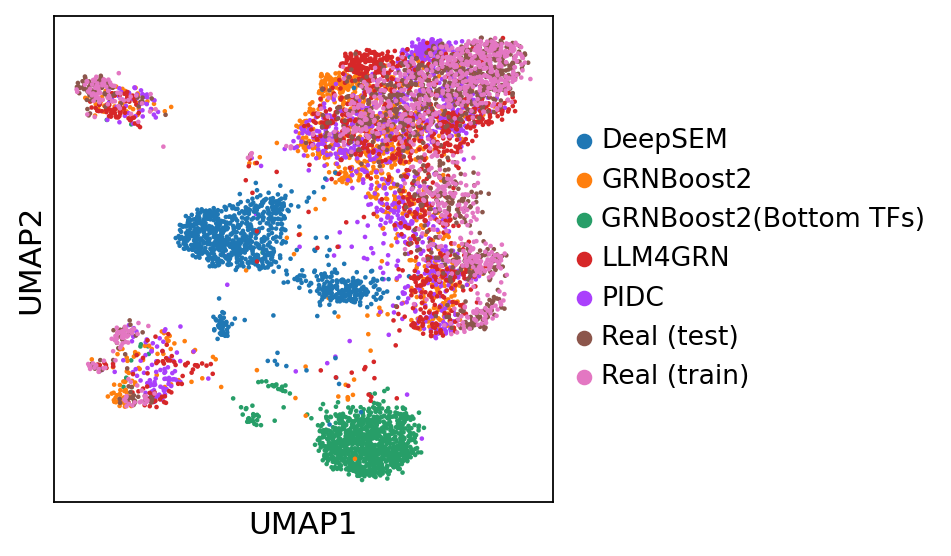

In [153]:
import scanpy as sc
import numpy as np
import os
import matplotlib.pyplot as plt

sc.set_figure_params(dpi=100, color_map="viridis_r")
sc.settings.verbosity = 0
sc.logging.print_header()

# Define GRN methods 
grn_methods = ['GRNB2_Bottom', 'GRNB2', 'PIDC', 'DeepSEM', 'GPT4.1']
generated_data_list = []

dataset='PBMC'
paths={
    "PBMC": "PBMC68k"
}

# Load generated data
for method in grn_methods:
    path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
    data = sc.read_h5ad(path)
    data.obs['type'] = method
    generated_data_list.append(data)

# Load real data
real_data_train = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_train.h5ad')
real_data_train = real_data_train[:1000, :]  # Limit to 1000 samples
real_data_train.obs['type'] = 'Real (train)'

real_data = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_test.h5ad')
real_data = real_data[:1000, :]  # Limit to 1000 samples
real_data.obs['type'] = 'Real (test)'

# Combine all data
all_data = sc.AnnData(np.vstack([d.X for d in generated_data_list] + [real_data.X] + [real_data_train.X]))
all_data.obs['type'] = sum([[m] * len(real_data) for m in grn_methods], []) + ['Real (test)'] * len(real_data) + ['Real (train)'] * len(real_data)
all_data.obs['type'] = all_data.obs['type'].replace('GRNB2_Bottom', 'GRNBoost2(Bottom TFs)')
all_data.obs['type'] = all_data.obs['type'].replace('GRNB2', 'GRNBoost2')
all_data.obs['type'] = all_data.obs['type'].replace('GPT4.1', 'LLM4GRN')

# Preprocessing
sc.pp.normalize_per_cell(all_data)
sc.pp.log1p(all_data)
sc.pp.neighbors(all_data, n_neighbors=30)
sc.tl.umap(all_data)

# Plot and save
sc.set_figure_params(scanpy=True, fontsize=14)
fig = sc.pl.umap(all_data, color='type', show=False, return_fig=True, title="", legend_fontsize=12)
fig.savefig(f"grn_umap_plot_{dataset}.pdf", bbox_inches='tight')


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
/usr/local/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'type' as categorical


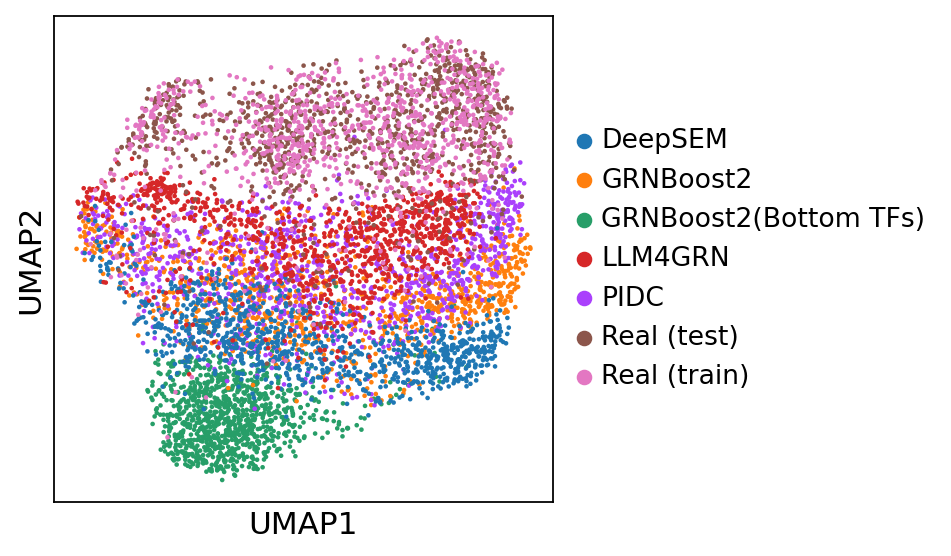

In [154]:
# Define GRN methods 
grn_methods = ['GRNB2_Bottom', 'GRNB2', 'PIDC', 'DeepSEM', 'GPT4.1']
generated_data_list = []

dataset='PBMC_CTL'
paths={
    "PBMC": "PBMC68k",
    "PBMC_CTL": "PBMC_CTL20k"
}

# Load generated data
for method in grn_methods:
    path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
    data = sc.read_h5ad(path)
    data.obs['type'] = method
    generated_data_list.append(data)

# Load real data
real_data_train = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_train.h5ad')
real_data_train = real_data_train[:1000, :]  # Limit to 1000 samples
real_data_train.obs['type'] = 'Real (train)'

real_data = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_test.h5ad')
real_data = real_data[:1000, :]  # Limit to 1000 samples
real_data.obs['type'] = 'Real (test)'

# Combine all data
all_data = sc.AnnData(np.vstack([d.X for d in generated_data_list] + [real_data.X] + [real_data_train.X]))
all_data.obs['type'] = sum([[m] * len(real_data) for m in grn_methods], []) + ['Real (test)'] * len(real_data) + ['Real (train)'] * len(real_data)
all_data.obs['type'] = all_data.obs['type'].replace('GRNB2_Bottom', 'GRNBoost2(Bottom TFs)')
all_data.obs['type'] = all_data.obs['type'].replace('GRNB2', 'GRNBoost2')
all_data.obs['type'] = all_data.obs['type'].replace('GPT4.1', 'LLM4GRN')

# Preprocessing
sc.pp.normalize_per_cell(all_data)
sc.pp.log1p(all_data)
sc.pp.neighbors(all_data, n_neighbors=30)
sc.tl.umap(all_data)

# Plot and save
sc.set_figure_params(scanpy=True, fontsize=14)
fig = sc.pl.umap(all_data, color='type', show=False, return_fig=True, title="", legend_fontsize=12)
fig.savefig(f"grn_umap_plot_{dataset}.pdf", bbox_inches='tight')

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
/usr/local/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'type' as categorical


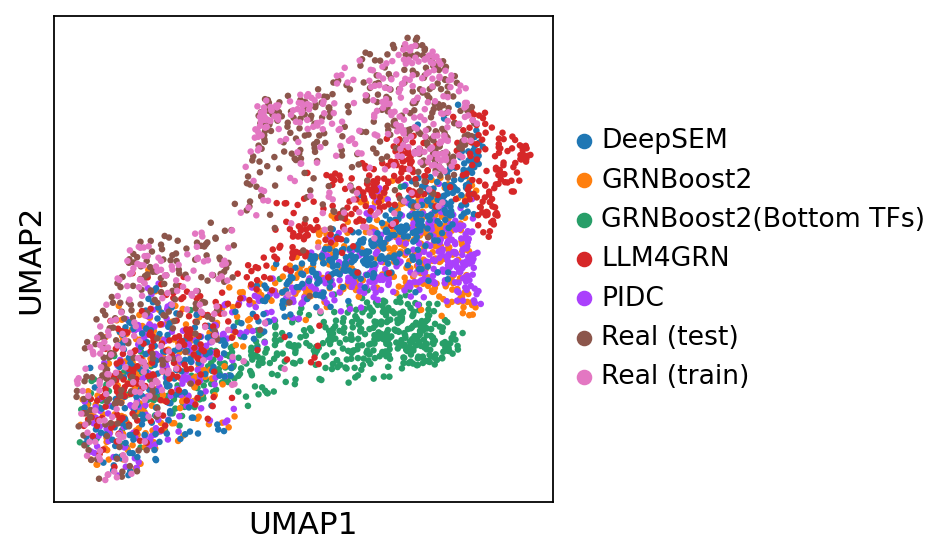

In [155]:
# Define GRN methods 
grn_methods = ['GRNB2_Bottom', 'GRNB2', 'PIDC', 'DeepSEM', 'GPT4.1']
generated_data_list = []

dataset='BoneMarrow'
paths={
    "PBMC": "PBMC68k",
    "PBMC_CTL": "PBMC_CTL20k",
    "BoneMarrow": "BoneMarrow2k"
}

# Load generated data
for method in grn_methods:
    path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
    data = sc.read_h5ad(path)
    data.obs['type'] = method
    generated_data_list.append(data)

# Load real data
real_data_train = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_train.h5ad')
real_data_train = real_data_train[:500, :]  # Limit to 1000 samples
real_data_train.obs['type'] = 'Real (train)'

real_data = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_test.h5ad')
real_data = real_data[:500, :]  # Limit to 1000 samples
real_data.obs['type'] = 'Real (test)'

# Combine all data
all_data = sc.AnnData(np.vstack([d.X for d in generated_data_list] + [real_data.X] + [real_data_train.X]))
all_data.obs['type'] = sum([[m] * len(real_data) for m in grn_methods], []) + ['Real (test)'] * len(real_data) + ['Real (train)'] * len(real_data)
all_data.obs['type'] = all_data.obs['type'].replace('GRNB2_Bottom', 'GRNBoost2(Bottom TFs)')
all_data.obs['type'] = all_data.obs['type'].replace('GRNB2', 'GRNBoost2')
all_data.obs['type'] = all_data.obs['type'].replace('GPT4.1', 'LLM4GRN')

# Preprocessing
sc.pp.normalize_per_cell(all_data)
sc.pp.log1p(all_data)
sc.pp.neighbors(all_data, n_neighbors=30)
sc.tl.umap(all_data)

# Plot and save
sc.set_figure_params(scanpy=True, fontsize=14)
fig = sc.pl.umap(all_data, color='type', show=False, return_fig=True, title="", legend_fontsize=12)
fig.savefig(f"grn_umap_plot_{dataset}.pdf", bbox_inches='tight')

In [457]:
marker_genes_dict = {
    "B-cell": ["CD79A", "MS4A1"],
    "Dendritic": ["FCER1A", "CST3"],
    "Monocytes": ["FCGR3A"],
    "NK": ["GNLY", "NKG7"],
    "Other": ["IGLL1"],
    "Plasma": ["IGJ"],
    "T-cell": ["CD3D"],
}

In [458]:
dataset='PBMC'
real_data = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_test.h5ad')

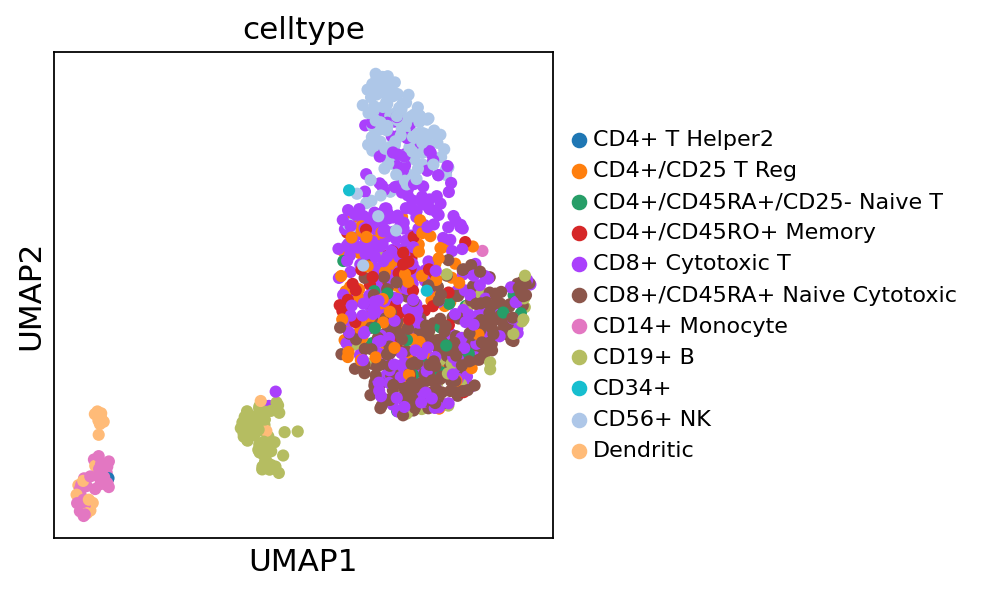

In [459]:
sc.pp.neighbors(real_data, n_neighbors=30)
sc.tl.umap(real_data)
sc.pl.umap(real_data, color="celltype", legend_fontsize=10, legend_fontoutline=2)

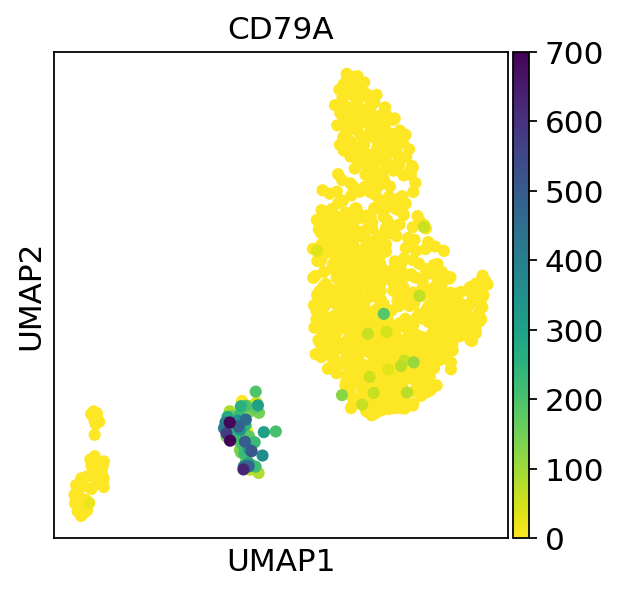

In [460]:
sc.pp.neighbors(real_data, n_neighbors=30)
sc.tl.umap(real_data)
sc.pl.umap(real_data, color="CD79A")

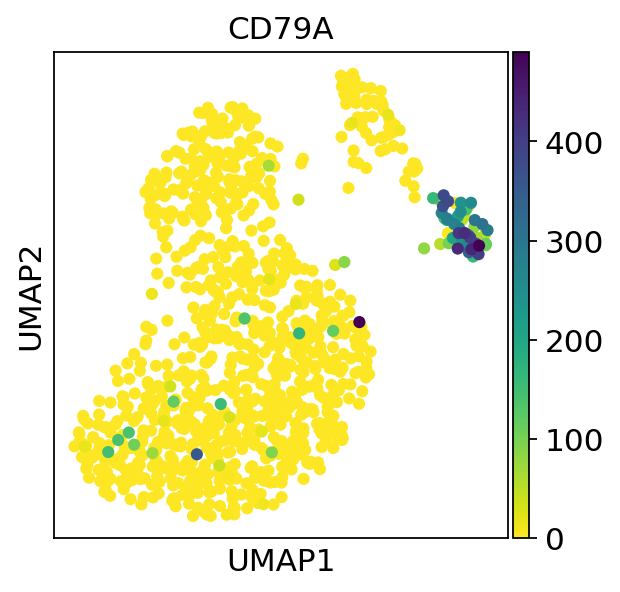

In [461]:
method='GPT4.1'
path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
generate_data = sc.read_h5ad(path)
sc.pp.neighbors(generate_data, n_neighbors=30)
sc.tl.umap(generate_data)
sc.pl.umap(generate_data, color="CD79A")

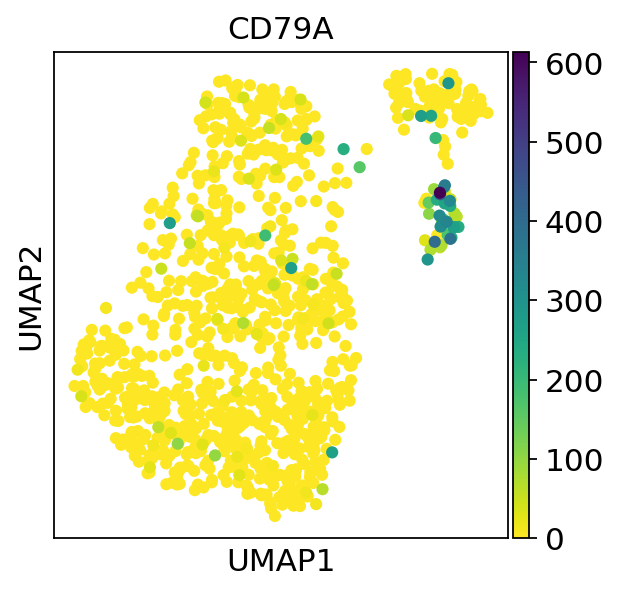

In [462]:
method='GRNB2'
path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
generate_data = sc.read_h5ad(path)
sc.pp.neighbors(generate_data, n_neighbors=30)
sc.tl.umap(generate_data)
sc.pl.umap(generate_data, color="CD79A")

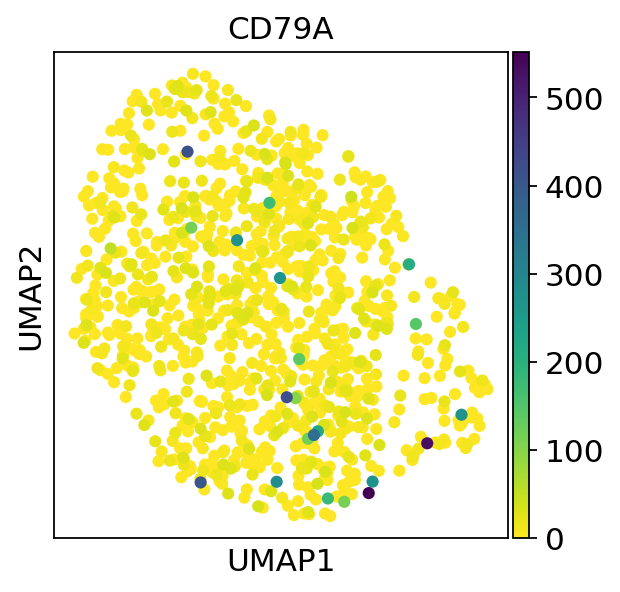

In [463]:
method='GRNB2_Bottom'
path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
generate_data = sc.read_h5ad(path)
sc.pp.neighbors(generate_data, n_neighbors=30)
sc.tl.umap(generate_data)
sc.pl.umap(generate_data, color="CD79A")

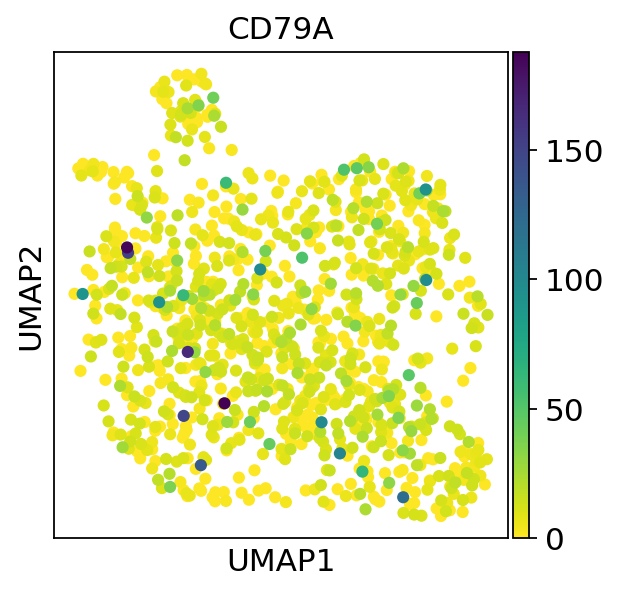

In [464]:
method='DeepSEM'
path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
generate_data = sc.read_h5ad(path)
sc.pp.neighbors(generate_data, n_neighbors=30)
sc.tl.umap(generate_data)
sc.pl.umap(generate_data, color="CD79A")

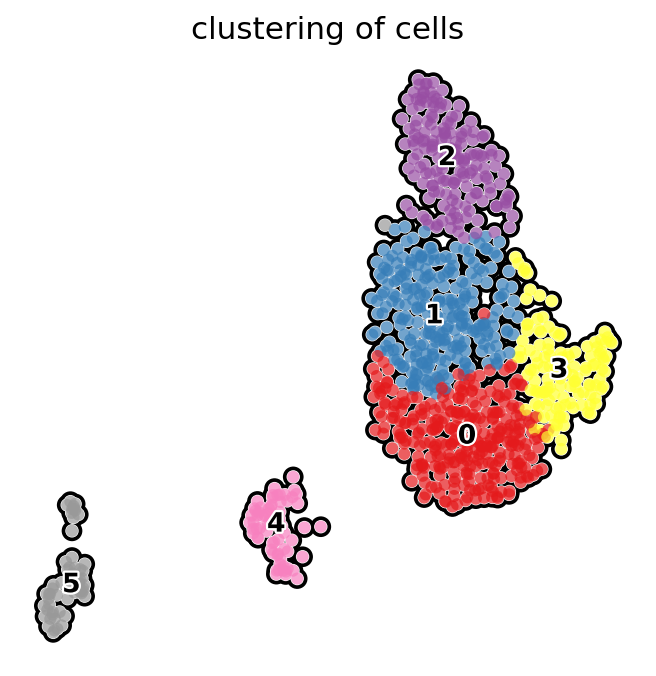

In [465]:
from matplotlib.pyplot import rc_context
dataset='PBMC'
real_data = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_test.h5ad')
sc.pp.neighbors(real_data, n_neighbors=30)
sc.tl.umap(real_data)
sc.tl.leiden(
    real_data,
    key_added="clusters",
    resolution=0.5,
    n_iterations=2,
    directed=False,
)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        real_data,
        color="clusters",
        add_outline=True,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        title="clustering of cells",
        palette="Set1",
    )

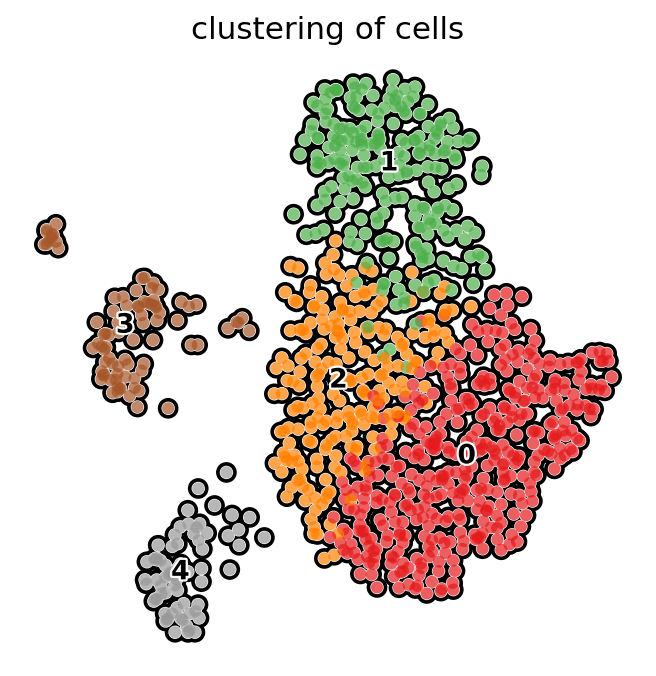

In [466]:
from matplotlib.pyplot import rc_context
dataset='PBMC'
real_data = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_train.h5ad')[:1000, :]
sc.pp.neighbors(real_data, n_neighbors=30)
sc.tl.umap(real_data)
sc.tl.leiden(
    real_data,
    key_added="clusters",
    resolution=0.5,
    n_iterations=2,
    directed=False,
)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        real_data,
        color="clusters",
        add_outline=True,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        title="clustering of cells",
        palette="Set1",
    )

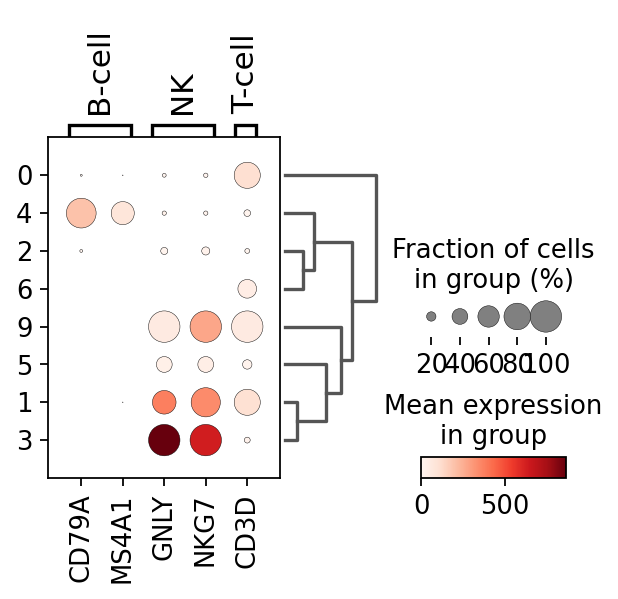

In [467]:
marker_genes_dict = {
    "B-cell": ["CD79A", "MS4A1"],
    "NK": ["GNLY", "NKG7"],
    "T-cell": ["CD3D"],
}
sc.pl.dotplot(real_data, marker_genes_dict, "cluster", dendrogram=True)


In [468]:
# sc.pl.dotplot(real_data, groupby="celltype", var_names=real_data.var_names, dendrogram=True)

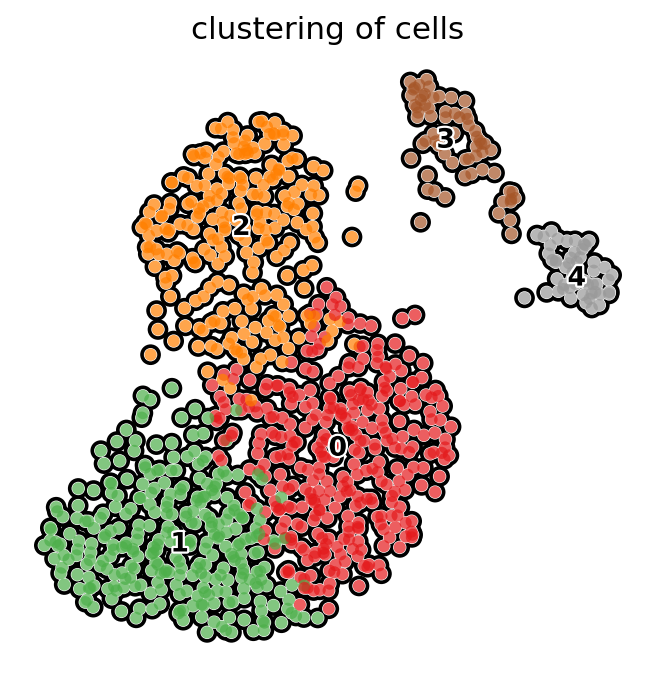

In [469]:
method='GPT4.1'
path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
generate_data = sc.read_h5ad(path)
sc.pp.neighbors(generate_data, n_neighbors=30)
sc.tl.umap(generate_data)
sc.tl.leiden(
    generate_data,
    key_added="clusters",
    resolution=0.5,
    n_iterations=2,
    directed=False,
)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        generate_data,
        color="clusters",
        add_outline=True,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        title="clustering of cells",
        palette="Set1",
    )

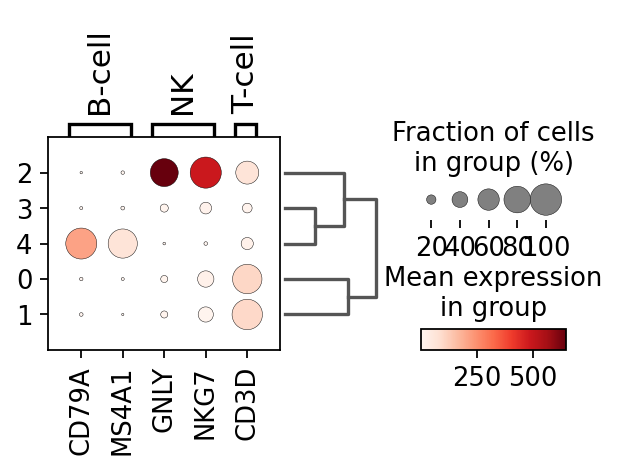

In [470]:
marker_genes_dict = {
    "B-cell": ["CD79A", "MS4A1"],
    "NK": ["GNLY", "NKG7"],
    "T-cell": ["CD3D"],
}
sc.pl.dotplot(generate_data, marker_genes_dict, "clusters", dendrogram=True)


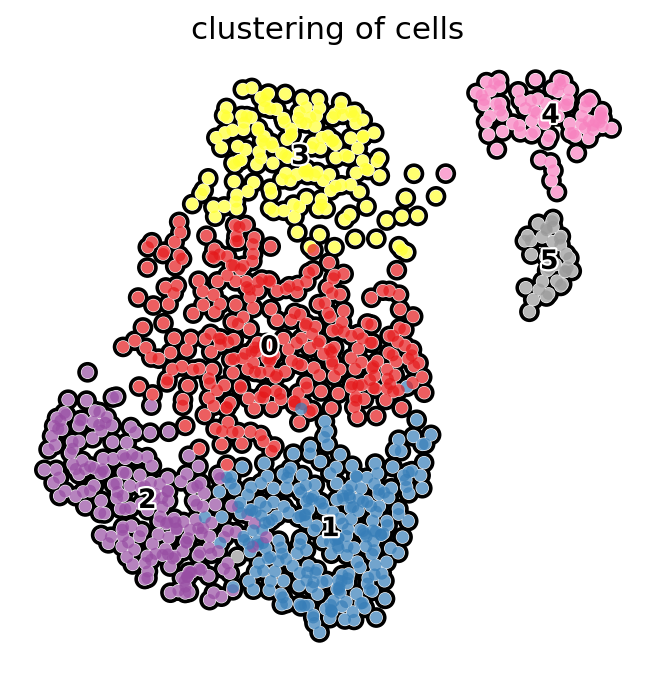

In [471]:
method='GRNB2'
path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
generate_data = sc.read_h5ad(path)
sc.pp.neighbors(generate_data, n_neighbors=30)
sc.tl.umap(generate_data)
sc.tl.leiden(
    generate_data,
    key_added="clusters",
    resolution=0.5,
    n_iterations=2,
    directed=False,
)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        generate_data,
        color="clusters",
        add_outline=True,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        title="clustering of cells",
        palette="Set1",
    )

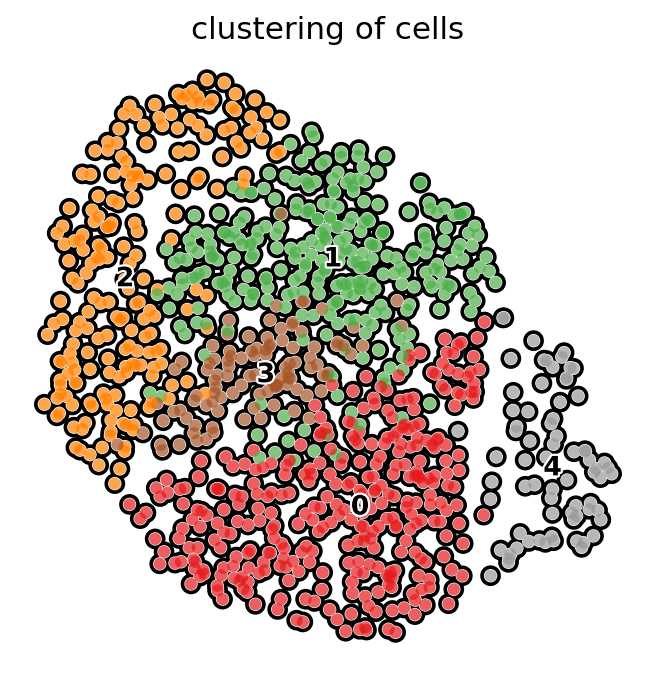

In [472]:
method='GRNB2_Bottom'
path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
generate_data = sc.read_h5ad(path)
sc.pp.neighbors(generate_data, n_neighbors=30)
sc.tl.umap(generate_data)
sc.tl.leiden(
    generate_data,
    key_added="clusters",
    resolution=0.5,
    n_iterations=2,
    directed=True,
)
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        generate_data,
        color="clusters",
        add_outline=True,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        title="clustering of cells",
        palette="Set1",
    )

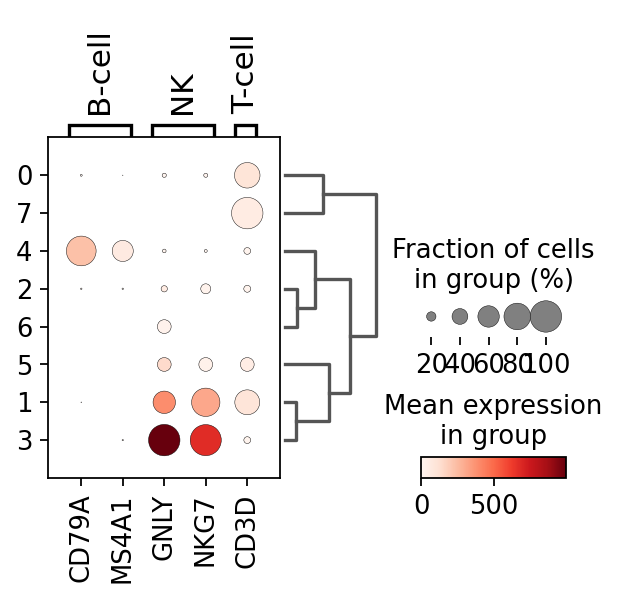

In [473]:
marker_genes_dict = {
    "B-cell": ["CD79A", "MS4A1"],
    "NK": ["GNLY", "NKG7"],
    "T-cell": ["CD3D"],
}
real_data = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_test.h5ad')
# ann_clustered = real_data.copy()
# sc.pp.recipe_zheng17(ann_clustered)
# sc.tl.pca(ann_clustered, n_comps=50)
# sc.pp.neighbors(ann_clustered, n_pcs=50)
# sc.tl.louvain(ann_clustered, resolution=0.15)
# real_data.obs["cluster"] = ann_clustered.obs["louvain"]

sc.pp.neighbors(real_data, n_neighbors=30)
sc.tl.umap(real_data)
sc.pl.dotplot(real_data, marker_genes_dict, "cluster", dendrogram=True)

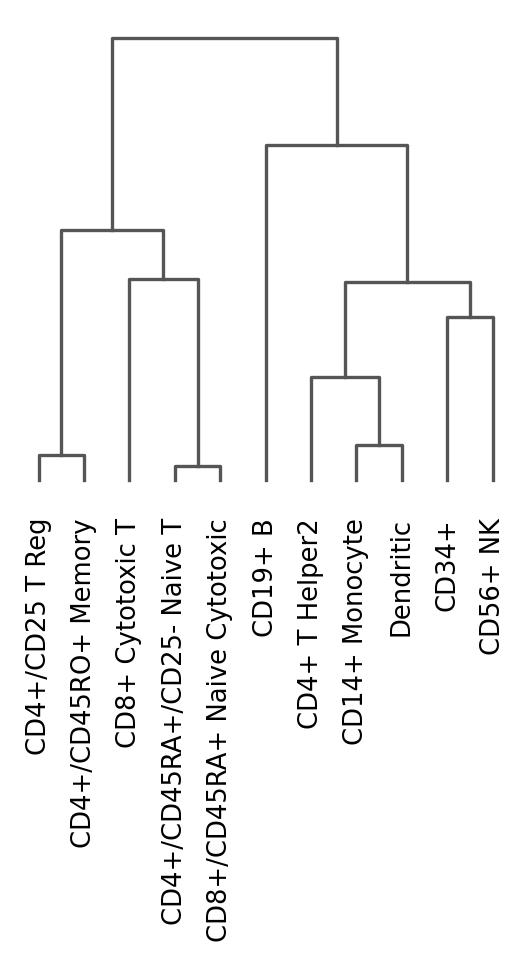

In [474]:
ax = sc.pl.dendrogram(real_data, "celltype")

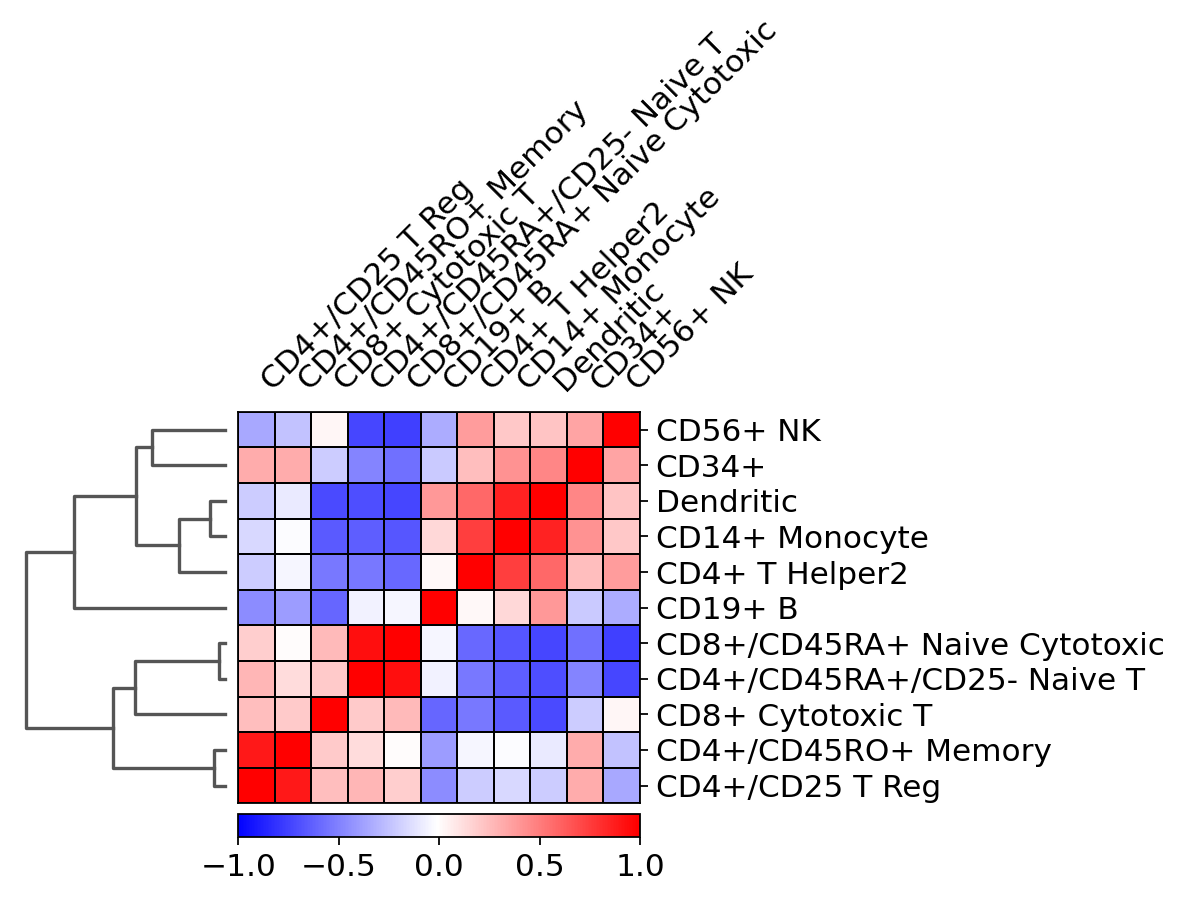

In [475]:
ax = sc.pl.correlation_matrix(real_data, "celltype", figsize=(5, 3.5))

In [476]:
# ax = sc.pl.correlation_matrix(real_data, figsize=(5, 3.5))

In [477]:
generate_data

AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'clusters'
    uns: 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

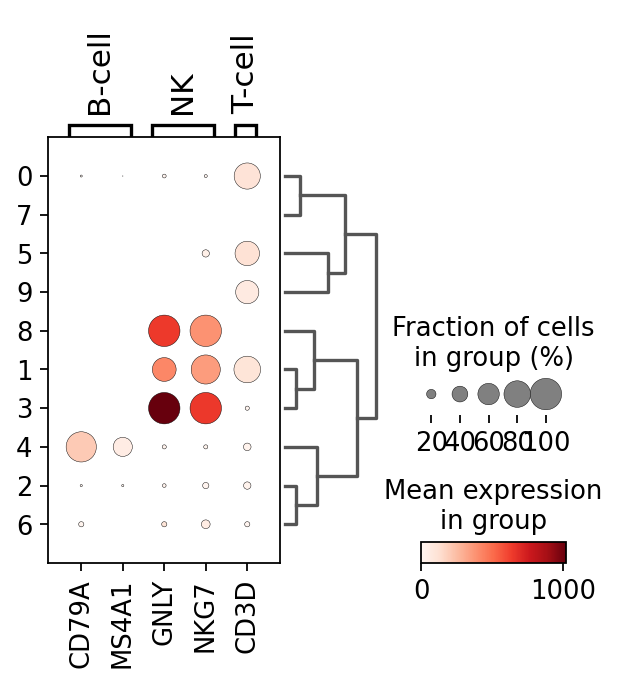

In [478]:
real_data = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_train.h5ad')[-1000:, :]
# ann_clustered = real_data.copy()
# sc.pp.recipe_zheng17(ann_clustered)
# sc.tl.pca(ann_clustered, n_comps=50)
# sc.pp.neighbors(ann_clustered, n_pcs=50)
# sc.tl.louvain(ann_clustered, resolution=0.15)
# real_data.obs["cluster"] = ann_clustered.obs["louvain"]

sc.pp.neighbors(real_data, n_neighbors=30)
sc.tl.umap(real_data)
sc.pl.dotplot(real_data, marker_genes_dict, "cluster", dendrogram=True)

In [479]:
generate_data

AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'clusters'
    uns: 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [480]:
# for method in ['GRNB2_Bottom', 'GRNB2', 'GPT4.1']:
#     path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
#     generate_data = sc.read_h5ad(path)
#     sc.pp.neighbors(generate_data, n_neighbors=30)
#     sc.tl.umap(generate_data)
#     sc.pl.dotplot(generate_data, marker_genes_dict, "cluster", dendrogram=True)

In [481]:
# real_data.obs.celltype.unique()

In [482]:
# real_data.shape

In [483]:
# sc.tl.paga(combined)

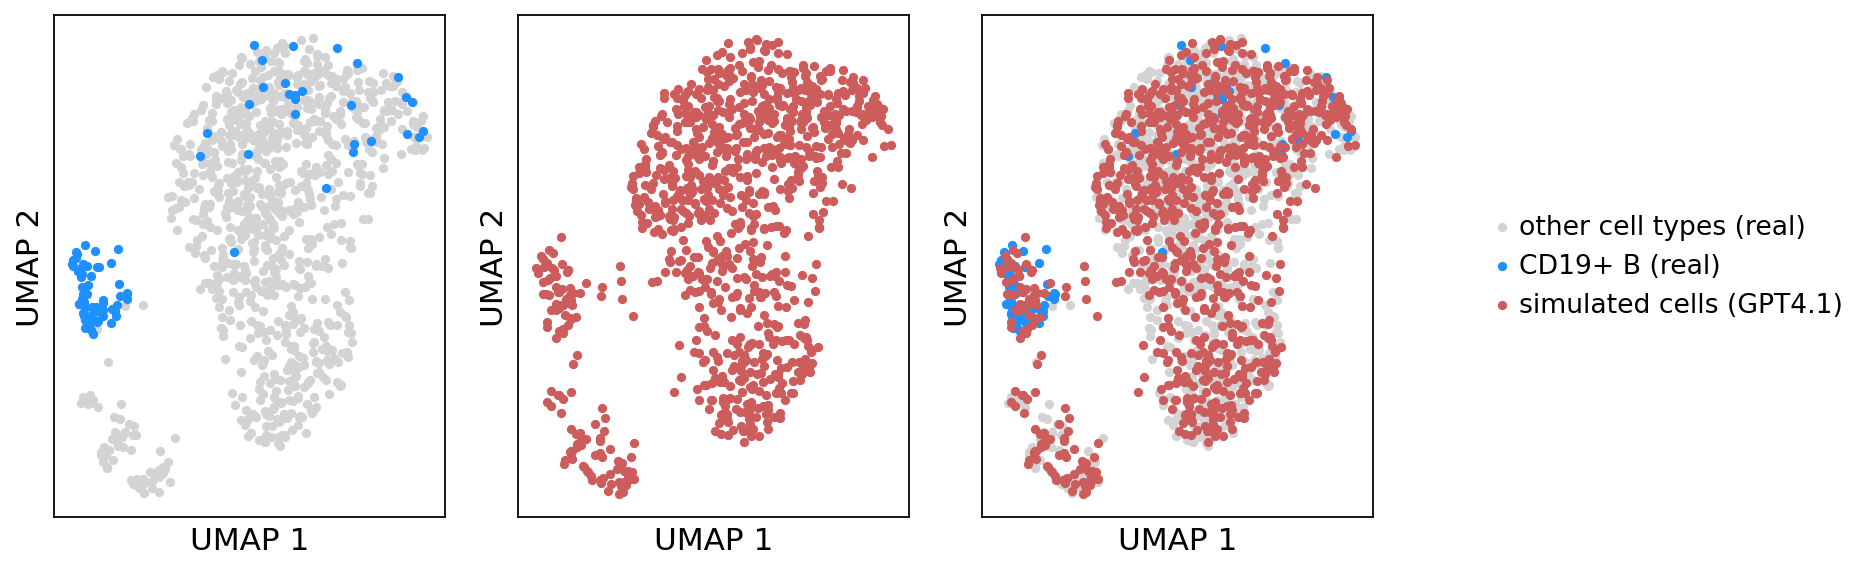

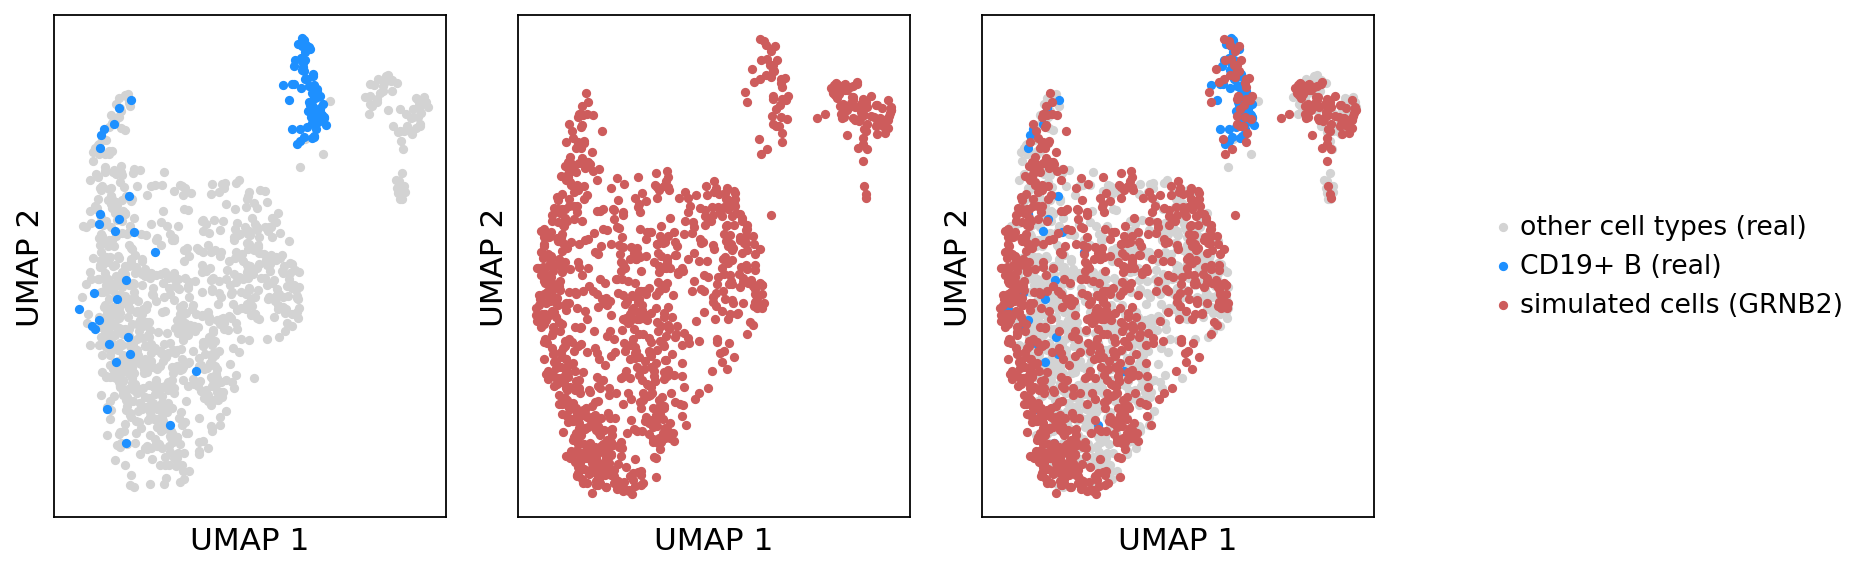

In [507]:

# Load real and simulated data
dataset='PBMC'
real_data = sc.read_h5ad(f'../data/processed/{dataset}/CrossVal_1000/{paths[dataset]}_test.h5ad')
real = real_data.copy() 




for i, method in enumerate(['GPT4.1', 'GRNB2']):
    path = f'../data/generated/{dataset}/CrossVal_1000/KB_Sapien/freq_None/{method}/Seed1/TF10/GRouNdGAN/simulated_0.h5ad'
    generate_data = sc.read_h5ad(path)
    sim = generate_data.copy()
    
    # Compute or reuse UMAP (assuming same features and aligned)
    combined = real.concatenate(sim, batch_key="source", batch_categories=["real", "simulated"])
    sc.pp.neighbors(combined, n_neighbors=30)
    sc.tl.umap(combined)
    umap = combined.obsm["X_umap"]
    
    # Identify CD19+ B cells
    cd19b_mask = (combined.obs["celltype"] == "CD19+ B") & (combined.obs["source"] == "real")
    other_mask = (combined.obs["celltype"] != "CD19+ B") & (combined.obs["source"] == "real")
    sim_mask = combined.obs["source"] == "simulated"
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
    
    # Panel 1: Real data only, CD19+ B in blue
    axs[0].scatter(umap[other_mask, 0], umap[other_mask, 1], color="lightgray", s=10)
    axs[0].scatter(umap[cd19b_mask, 0], umap[cd19b_mask, 1], color="dodgerblue", s=10)
    axs[0].set_title("")
    
    # Panel 2: Simulated data only
    axs[1].scatter(umap[sim_mask, 0], umap[sim_mask, 1], color="indianred", s=10)
    axs[1].set_title("")
    
    # Panel 3: All together
    axs[2].scatter(umap[other_mask, 0], umap[other_mask, 1], color="lightgray", s=10, label="other cell types (real)")
    axs[2].scatter(umap[cd19b_mask, 0], umap[cd19b_mask, 1], color="dodgerblue", s=10, label="CD19+ B (real)")
    axs[2].scatter(umap[sim_mask, 0], umap[sim_mask, 1], color="indianred", s=10, label=f"simulated cells ({method})")
    axs[2].legend(
        bbox_to_anchor=(1.25, 0.5),  # shift to the right
        loc="center left",
        frameon=False,
        fontsize=12
    )
    
    # Axis cleanup
    for ax in axs:
        ax.set_xlabel("UMAP 1")
        ax.set_ylabel("UMAP 2")
        ax.set_xticks([])
        ax.set_yticks([])
    
    # plt.suptitle(f"{method}", fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f"cd19b_umap_panels{method}.pdf", bbox_inches='tight')
